In [2]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [1]:
years = ['2004','2005','2006','2007','2008','2009','2010','2011','2012']#,'2018']
len(years)

9

In [3]:
data = []
for year in years:
    website_url = requests.get('https://www.basketball-reference.com/players/j/jamesle01/gamelog/'+year)
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'class':'row_summable sortable stats_table'})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        data.append(cell.get_text())

In [4]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 29))

In [5]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 30):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
headers.remove('G')
headers.remove('Date')
headers.remove('Age')
headers.remove('Tm')
headers.remove('\xa0')
headers = ['G', 'Date', 'Age', 'Tm', 'HC'] + headers
print(headers)

['G', 'Date', 'Age', 'Tm', 'HC', 'Opp', '\xa0', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']


In [6]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)

In [7]:
df1 = df1.drop(['\xa0', 'Tm', 'Age', 'GS'], axis=1)
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,@,SAC,42:00,12,20,.600,0,2,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,@,PHO,41:00,8,17,.471,1,5,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,@,POR,39:00,3,12,.250,0,1,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,,DEN,41:00,3,11,.273,0,2,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,@,IND,44:00,8,18,.444,1,2,...,5,5,3,0,0,7,2,23,9.0,-7


In [8]:
df1['HC'] = df1['HC'].map({'@': 'Away', '': 'Home'})

In [9]:
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,Away,SAC,42:00,12,20,.600,0,2,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,Away,PHO,41:00,8,17,.471,1,5,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,Away,POR,39:00,3,12,.250,0,1,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,Home,DEN,41:00,3,11,.273,0,2,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,Away,IND,44:00,8,18,.444,1,2,...,5,5,3,0,0,7,2,23,9.0,-7


In [10]:
df1.MP = df1.MP.str[:-3]
df1.head()

,G,Date,HC,Opp,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,Away,SAC,42,12,20,.600,0,2,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,Away,PHO,41,8,17,.471,1,5,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,Away,POR,39,3,12,.250,0,1,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,Home,DEN,41,3,11,.273,0,2,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,Away,IND,44,8,18,.444,1,2,...,5,5,3,0,0,7,2,23,9.0,-7


In [11]:
df2 = df1.drop(['G','Date', 'HC','Opp', '+/-'], axis=1)

In [12]:
df2['PT'] = df2['PTS']
df2 = df2.drop(['PTS'], axis=1)
df2['PTS'] = df2['PT']
df2 = df2.drop(['PT'], axis=1)
df2.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,42,12,20,.600,0,2,.000,1,3,.333,2,4,6,9,4,0,2,3,24.7,25
1,41,8,17,.471,1,5,.200,4,7,.571,2,10,12,8,1,0,7,1,14.7,21
2,39,3,12,.250,0,1,.000,2,2,1.000,0,4,4,6,2,0,2,3,5.0,8
3,41,3,11,.273,0,2,.000,1,1,1.000,2,9,11,7,2,3,2,1,11.2,7
4,44,8,18,.444,1,2,.500,6,7,.857,0,5,5,3,0,0,7,2,9.0,23


In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df2.columns
sc2 = StandardScaler()
for col in cols:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
    df2[[col]] = sc2.fit_transform(df2[[col]])

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with 

AxesSubplot(0.127273,0.125;0.617727x0.755)


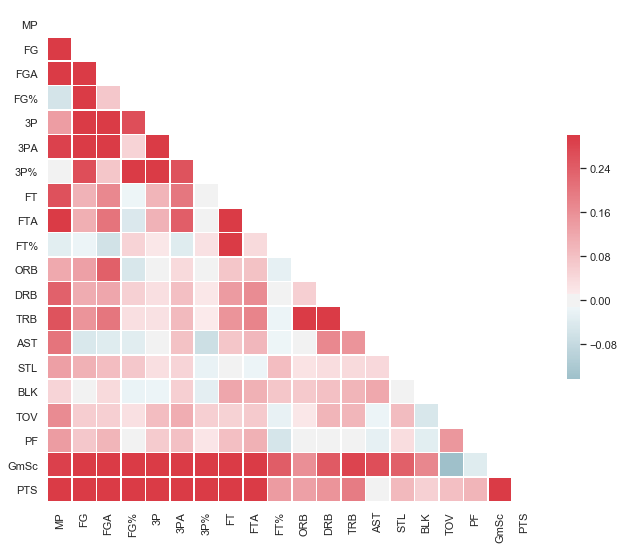

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df2

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

In [16]:
df3 = df2.copy(deep=True)
df3['PTS'] = df2.PTS.shift(-1)
df3 = df3.dropna()
df3.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,PTS
0,0.488857,0.660938,-0.081052,1.082158,-0.958452,-0.839527,-1.133468,-1.517029,-1.283767,-2.310279,0.654144,-0.727431,-0.395553,0.781809,1.667941,-0.888760,-0.74979,0.822840,0.315937,-0.788594
1,0.290726,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,0.654144,1.525154,1.625730,0.410315,-0.539251,-0.888760,2.05480,-0.713574,-0.898662,-2.332176
2,-0.105536,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,-1.059564,-0.727431,-1.069315,-0.332673,0.196480,-0.888760,-0.74979,0.822840,-2.076822,-2.450913
3,0.290726,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,0.654144,1.149723,1.288849,0.038821,0.196480,2.267712,-0.74979,-0.713574,-1.323771,-0.551119
4,0.885119,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,-1.059564,-0.352000,-0.732434,-1.447155,-1.274982,-0.888760,2.05480,0.054633,-1.590982,-1.263542


AxesSubplot(0.127273,0.125;0.617727x0.755)


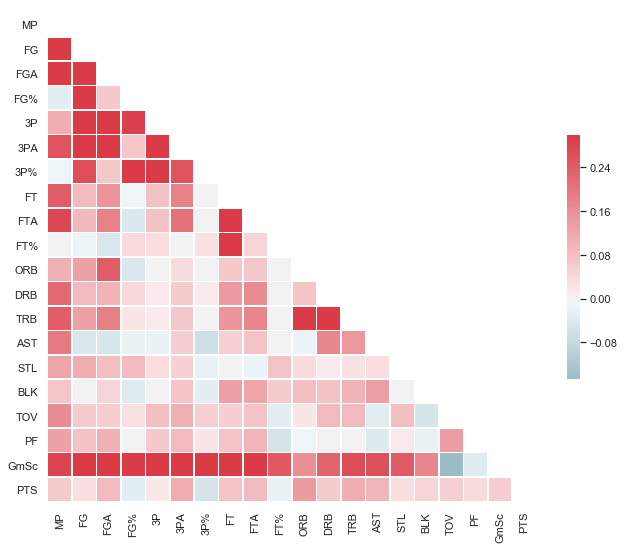

In [17]:
sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}))

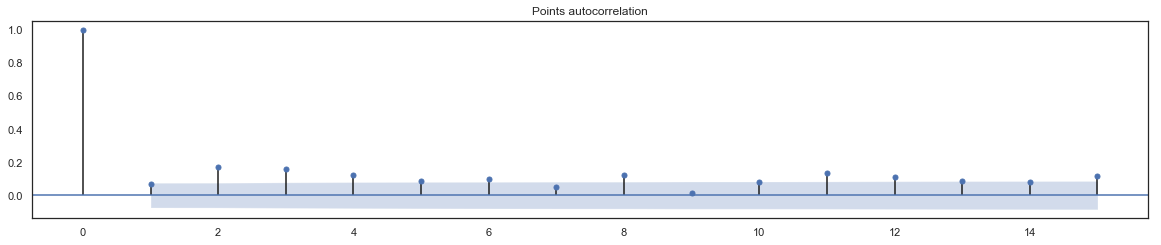

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.PTS, lags=15, ax=ax1, title= 'Points autocorrelation')

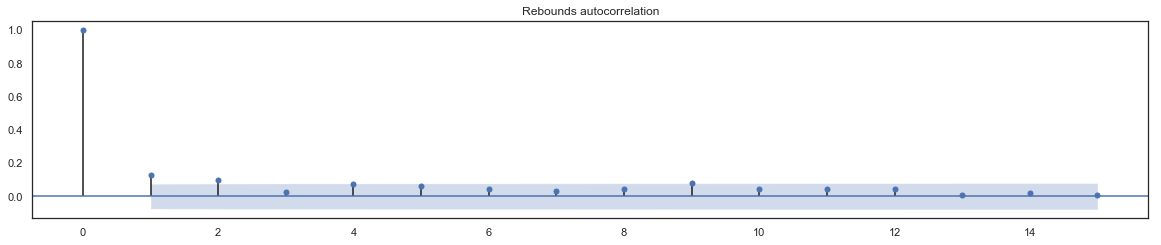

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.TRB, lags=15, ax=ax1, title='Rebounds autocorrelation')

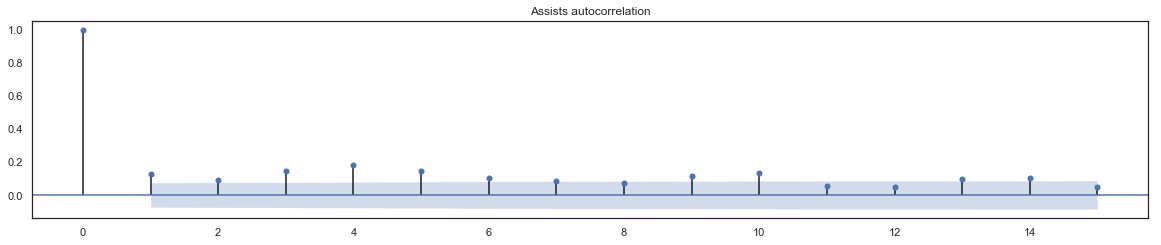

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df2.AST, lags=15, ax=ax1, title='Assists autocorrelation')

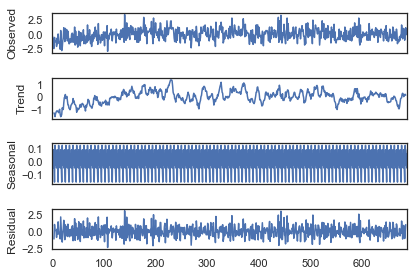

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
result = seasonal_decompose(df2.PTS, model='additive', freq=7)
result.plot()
plt.show()

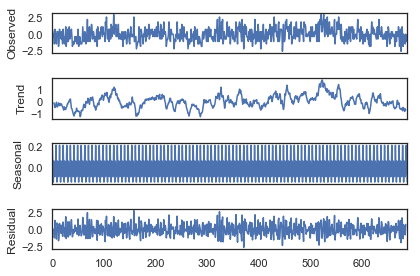

In [22]:
result = seasonal_decompose(df2.AST, model='additive', freq=7)
result.plot()
plt.show()

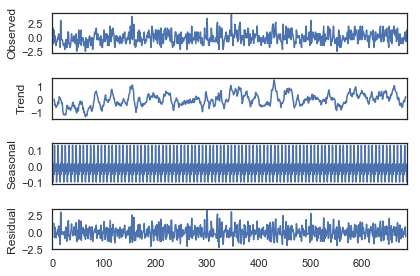

In [23]:
result = seasonal_decompose(df2.TRB, model='additive', freq=7)
result.plot()
plt.show()

In [24]:
df2['Date'] = df1['Date']
df2['Opp'] = df1['Opp']
df2['HC'] = df1['HC']
df2.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,AST,STL,BLK,TOV,PF,GmSc,PTS,Date,Opp,HC
0,0.488857,0.660938,-0.081052,1.082158,-0.958452,-0.839527,-1.133468,-1.517029,-1.283767,-2.310279,...,0.781809,1.667941,-0.888760,-0.74979,0.822840,0.315937,-0.313645,2003-10-29,SAC,Away
1,0.290726,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,...,0.410315,-0.539251,-0.888760,2.05480,-0.713574,-0.898662,-0.788594,2003-10-30,PHO,Away
2,-0.105536,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,...,-0.332673,0.196480,-0.888760,-0.74979,0.822840,-2.076822,-2.332176,2003-11-01,POR,Away
3,0.290726,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,...,0.038821,0.196480,2.267712,-0.74979,-0.713574,-1.323771,-2.450913,2003-11-05,DEN,Home
4,0.885119,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,...,-1.447155,-1.274982,-0.888760,2.05480,0.054633,-1.590982,-0.551119,2003-11-07,IND,Away


In [25]:
df2['Date'] = pd.to_datetime(df2['Date'])
#df2['Year'] = df2['Date'].dt.year
#df2['Month'] = df2['Date'].dt.month
#df2['Week'] = df2['Date'].dt.week
#df2['Yearday'] = df2['Date'].dt.dayofyear
df2['Rest'] = df2['Date'].dt.dayofyear.diff()%365
df2 = df2.dropna()

In [26]:
df2 = df2.drop(['Date'], axis=1)

In [87]:
df4 = df2.copy(deep=True)
df4['CurrOpp'] = df4.Opp.shift(-1)
df4['CurrHC'] = df4.HC.shift(-1)
#df4['Year'] = df4.Year.shift(-1)
#df4['Month'] = df4.Month.shift(-1)
#df4['Week'] = df4.Week.shift(-1)
#df4['Yearday'] = df4.Yearday.shift(-1)
df4['CurrRest'] = df4.Rest.shift(-1)

In [34]:
df4.to_csv('LeBronJamesStatLog.csv')

In [84]:
dum1 = pd.get_dummies(df4['Opp'])
dum2 = pd.get_dummies(df4['HC'])
dum3 = pd.get_dummies(df4['CurrOpp'])
dum4 = pd.get_dummies(df4['CurrHC'])
df4 = pd.concat([df4, dum1, dum2, dum3, dum4], axis=1)
df4 = df4.drop(['Opp', 'HC', 'CurrOpp', 'CurrHC'], axis=1)

In [88]:
standings = ['ATL', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET','GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NJN','NOH', 'NOK', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS','SEA', 'TOR', 'UTA', 'WAS']
#rankings = [27, 4, 23, 24, 20, 6, 28, 14, 19, 3, 1, 8, 18, 21, 29, 15, 16, 12, 9, 22, 10, 26, 5, 30, 7, 25, 13, 2, 11]
for x in range(len(standings)):
    df4 = df4.replace(standings[x],x)
df4.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,GmSc,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest
1,0.290726,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,...,2.054800,-0.713574,-0.898662,-0.788594,24,Away,1.0,25.0,Away,2.0
2,-0.105536,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,...,-0.749790,0.822840,-2.076822,-2.332176,25,Away,2.0,6.0,Home,4.0
3,0.290726,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,...,-0.749790,-0.713574,-1.323771,-2.450913,6,Home,4.0,10.0,Away,2.0
4,0.885119,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,...,2.054800,0.054633,-1.590982,-0.551119,10,Away,2.0,14.0,Away,2.0
7,0.488857,-1.192737,-1.089083,-0.744236,0.481839,0.405310,0.410246,-0.702773,-0.622859,-0.428186,...,0.372046,0.822840,-1.129435,-1.144805,14,Away,2.0,1.0,Away,2.0


In [89]:
df4 = df4.replace('Home',1)
df4 = df4.replace('Away',0)
df4.head()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,...,TOV,PF,GmSc,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest
1,0.290726,-0.574846,-0.685871,-0.095866,-0.238307,0.405310,-0.361611,-0.702773,-0.402556,-0.969147,...,2.054800,-0.713574,-0.898662,-0.788594,24,0,1.0,25.0,0.0,2.0
2,-0.105536,-2.119575,-1.693901,-2.114031,-0.958452,-1.254473,-1.133468,-1.245611,-1.504069,1.448272,...,-0.749790,0.822840,-2.076822,-2.332176,25,0,2.0,6.0,1.0,4.0
3,0.290726,-2.119575,-1.895508,-1.903996,-0.958452,-0.839527,-1.133468,-1.517029,-1.724372,1.448272,...,-0.749790,-0.713574,-1.323771,-2.450913,6,1,4.0,10.0,0.0,2.0
4,0.885119,-0.574846,-0.484264,-0.342429,-0.238307,-0.839527,0.796175,-0.159936,-0.402556,0.642466,...,2.054800,0.054633,-1.590982,-0.551119,10,0,2.0,14.0,0.0,2.0
7,0.488857,-1.192737,-1.089083,-0.744236,0.481839,0.405310,0.410246,-0.702773,-0.622859,-0.428186,...,0.372046,0.822840,-1.129435,-1.144805,14,0,2.0,1.0,0.0,2.0


In [90]:
df4['PredPts'] = df4.PTS.shift(-1)
df4['PredTrb'] = df4.TRB.shift(-1)
df4['PredAst'] = df4.AST.shift(-1)
df4 = df4.dropna()

In [91]:
print(len(df4))
df4 = df4[df4['Rest']<20]
print(len(df4))

651
644


In [93]:
df4 = df4.drop(['3P%','FG%','FT%'], axis=1)
#df4 = df4.drop(['ATL', 'BOS', 'BRK', 'CHI', 'CHO','CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR','SAC', 'SAS', 'TOR', 'UTA', 'Year','Month', 'Week', 'Yearday'], axis=1)
#df4 = df4.drop(['G', 'FG%','3PA','FTA','ORB','DRB'], axis=1)
df4['Opp'] = df4['Opp']/32
df4['Rest'] = df4['Rest']/20
df4['CurrOpp'] = df4['CurrOpp']/32
df4['CurrRest'] = df4['CurrRest']/20
df4.head()

,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,...,PTS,Opp,HC,Rest,CurrOpp,CurrHC,CurrRest,PredPts,PredTrb,PredAst
1,0.290726,-0.574846,-0.685871,-0.238307,0.405310,-0.702773,-0.402556,0.654144,1.525154,1.625730,...,-0.788594,0.75000,0,0.05,0.78125,0.0,0.1,-2.332176,-1.069315,-0.332673
2,-0.105536,-2.119575,-1.693901,-0.958452,-1.254473,-1.245611,-1.504069,-1.059564,-0.727431,-1.069315,...,-2.332176,0.78125,0,0.10,0.18750,1.0,0.2,-2.450913,1.288849,0.038821
3,0.290726,-2.119575,-1.895508,-0.958452,-0.839527,-1.517029,-1.724372,0.654144,1.149723,1.288849,...,-2.450913,0.18750,1,0.20,0.31250,0.0,0.1,-0.551119,-0.732434,-1.447155
4,0.885119,-0.574846,-0.484264,-0.238307,-0.839527,-0.159936,-0.402556,-1.059564,-0.352000,-0.732434,...,-0.551119,0.31250,0,0.10,0.43750,0.0,0.1,-1.144805,-1.406195,0.038821
7,0.488857,-1.192737,-1.089083,0.481839,0.405310,-0.702773,-0.622859,-0.202710,-1.478293,-1.406195,...,-1.144805,0.43750,0,0.10,0.03125,0.0,0.1,-2.094702,-0.732434,-1.447155


In [96]:
#df4 = df4.sample(frac=1).reset_index(drop=True)
train=df4[0:(round(len(df4)*.8))] 
test=df4[(round(len(df4)*.8 - 1)):]
trains = np.split(train, [23], axis=1)
train_y=trains[1]
train_x=trains[0]
tests = np.split(test, [23], axis=1)
test_y=tests[1]
test_x=tests[0]

In [97]:
train_y.head()

,PredPts,PredTrb,PredAst
1,-2.332176,-1.069315,-0.332673
2,-2.450913,1.288849,0.038821
3,-0.551119,-0.732434,-1.447155
4,-1.144805,-1.406195,0.038821
7,-2.094702,-0.732434,-1.447155


In [98]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

## Predicting Points

### Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.PredPts.values)
#reg.score(train_x.values, train_y.PredAst.values)

reg.coef_

array([-5.15927020e-02,  1.28286037e-02,  3.18068308e-02, -1.36026918e-01,
        1.80622118e-01,  4.55169851e-03,  5.00837211e-02,  8.17837135e-02,
       -2.21833317e-02,  1.22485897e-02,  1.45923031e-01,  2.24816663e-02,
       -1.55261573e-02,  3.84326235e-02,  1.59080459e-02,  4.21975470e-05,
       -1.05759638e-02,  1.06781027e-01,  5.62843469e-02,  5.50953419e-01,
        2.31844438e-01, -1.59628544e-01, -1.95313648e-02])

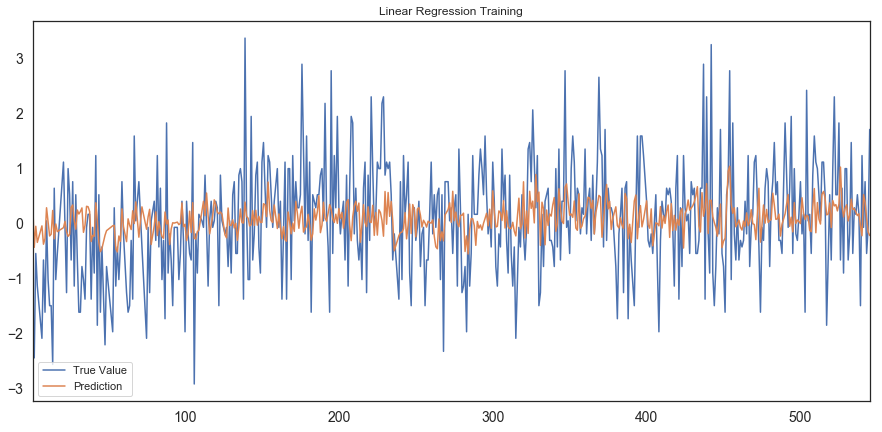

adj train r^2 = 0.02529675972540557
train mse = 0.957915477995007


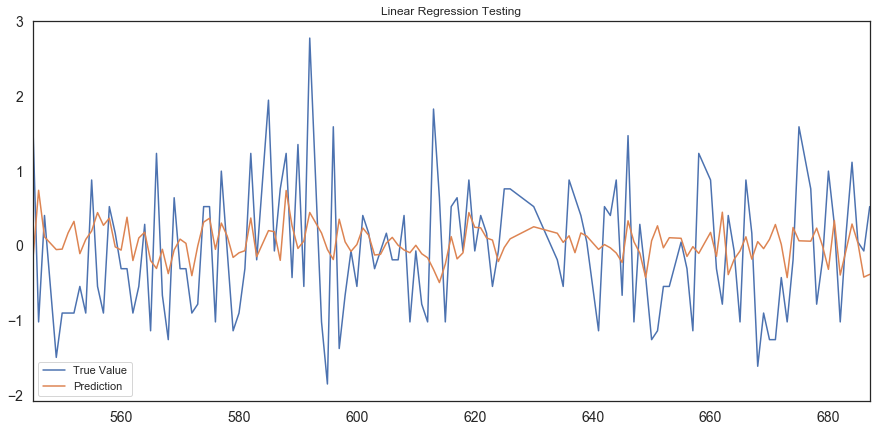

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.07176135299507203
test mse = 0.7588990379823461


In [100]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = reg.predict(train_x.values)
test_y['prediction'] = reg.predict(test_x.values)
train_y2['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y['PredPts'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y.PredPts, test_y.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y.PredPts, test_y.prediction)))

### SARIMAX

In [101]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
auto_arima(df4['PredPts'],seasonal=True,m=12).summary()

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a d

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  644
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -886.514
Date:                Sat, 25 May 2019   AIC                           1779.028
Time:                        17:14:25   BIC                           1792.426
Sample:                             0   HQIC                          1784.227
                                - 644                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0013      0.002      0.742      0.458      -0.002       0.005
ma.L1         -0.9563      0.013    -74.697      0.000      -0.981      -0.931
sigma2         0.9192      0.050     18.531      0.000       0.822       1.016
===================================================================================
Ljung-Box (Q):                       36.91   Jarque-Bera (JB):                 6.05
Prob(Q):                              0.61   Prob(JB):                         0.05
Heteroskedasticity (H):               0.79   Skew:                             0.22
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
trainvals = train_x.columns

In [103]:
exog = train[trainvals].values
model = SARIMAX(train['PredPts'],exog=exog,order=(0,1,1),enforce_invertibility=False, enforce_stationarity=False)
results = model.fit()
results.summary()

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                PredPts   No. Observations:                  515
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -697.621
Date:                Sat, 25 May 2019   AIC                           1445.242
Time:                        17:14:35   BIC                           1551.200
Sample:                             0   HQIC                          1486.778
                                - 515                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0372      0.066      0.566      0.571      -0.092       0.166
x2            -0.0507      0.053     -0.958      0.338      -0.154       0.053
x3             0.0246      0.070      0.355      0.723      -0.112       0.161
x4            -0.0858      0.079     -1.090      0.276      -0.240       0.068
x5             0.0842      0.083      1.014      0.310      -0.079       0.247
x6             0.0371      0.091      0.407      0.684      -0.142       0.216
x7            -0.0647      0.112     -0.576      0.565      -0.285       0.155
x8             0.1190      0.042      2.851      0.004       0.037       0.201
x9            -0.0578      0.028     -2.052      0.040      -0.113      -0.003
x10           -0.0046      0.022     -0.210      0.834      -0.047       0.038
x11            0.1075      0.048      2.245      0.025       0.014       0.201
x12            0.0284      0.044      0.640      0.522      -0.059       0.115
x13           -0.0159      0.045     -0.351      0.726      -0.105       0.073
x14            0.0679      0.044      1.533      0.125      -0.019       0.155
x15            0.0118      0.046      0.255      0.799      -0.079       0.103
x16           -0.0153      0.045     -0.340      0.734      -0.104       0.073
x17           -0.0361      0.018     -2.029      0.042      -0.071      -0.001
x18            0.1128      0.144      0.783      0.434      -0.170       0.395
x19            0.0117      0.090      0.130      0.896      -0.165       0.188
x20            0.6079      0.813      0.748      0.455      -0.986       2.202
x21            0.1772      0.154      1.147      0.251      -0.126       0.480
x22           -0.1932      0.089     -2.170      0.030      -0.368      -0.019
x23           -0.0213      0.037     -0.583      0.560      -0.093       0.050
ma.L1         -0.9517      0.015    -61.526      0.000      -0.982      -0.921
sigma2         0.8903      0.058     15.242      0.000       0.776       1.005
===================================================================================
Ljung-Box (Q):                       41.01   Jarque-Bera (JB):                 3.37
Prob(Q):                              0.43   Prob(JB):                         0.19
Heteroskedasticity (H):               1.01   Skew:                             0.19
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.25e+18. Standard errors may be unstable.
"""

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


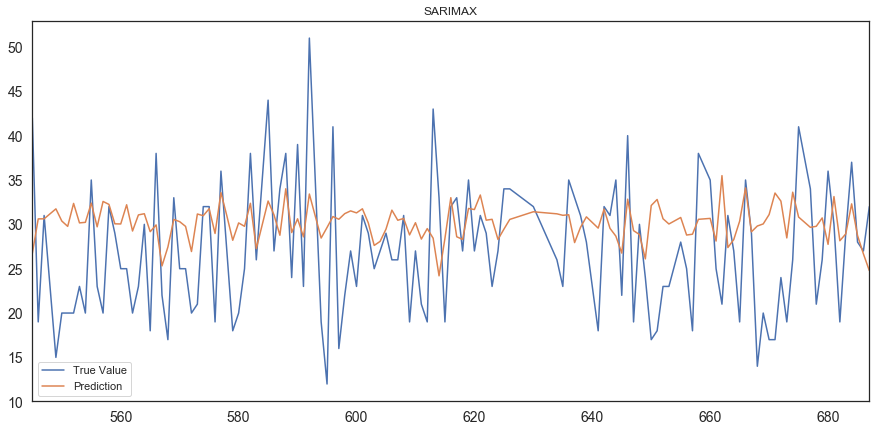

adj test r^2 = -0.22932007709743352
test mse = 61.74162071072228


In [104]:
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[trainvals]
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX Predictions')

test_y2 = test_y.copy(deep=True)
test_y2['prediction']=sc2.inverse_transform(predictions.values)
test_y2['PredPts']=sc2.inverse_transform(test_y2['PredPts'])
test_y2['PredPts'].plot(figsize=(15,7), title= 'SARIMAX', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'SARIMAX', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Extra Trees

In [105]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.PredPts.values.ravel())

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

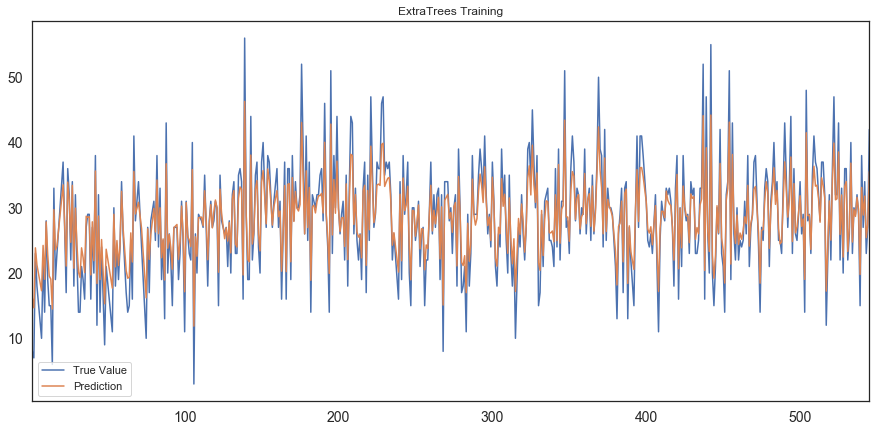

adj train r^2 = 0.8572341753236734
train mse = 0.14030690320435096


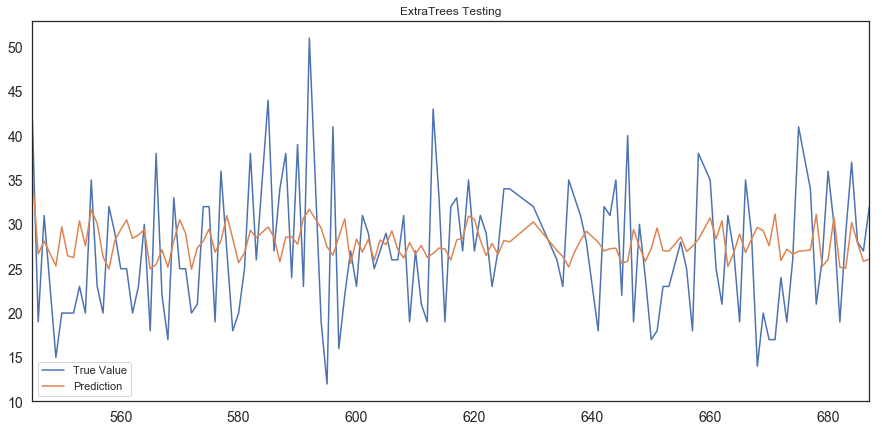

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.06554776302514354
test mse = 53.516286815384625


In [106]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'ExtraTrees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Random Forrest

In [107]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.PredPts.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

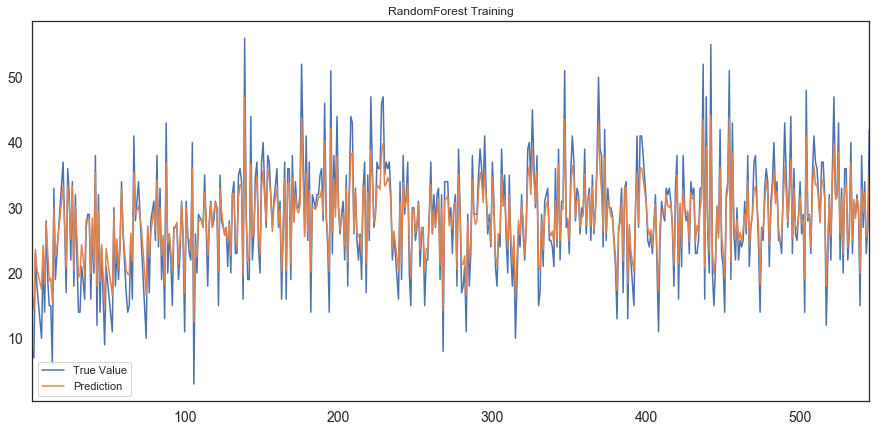

adj train r^2 = 0.8534377318848076
train mse = 0.14403795875147068


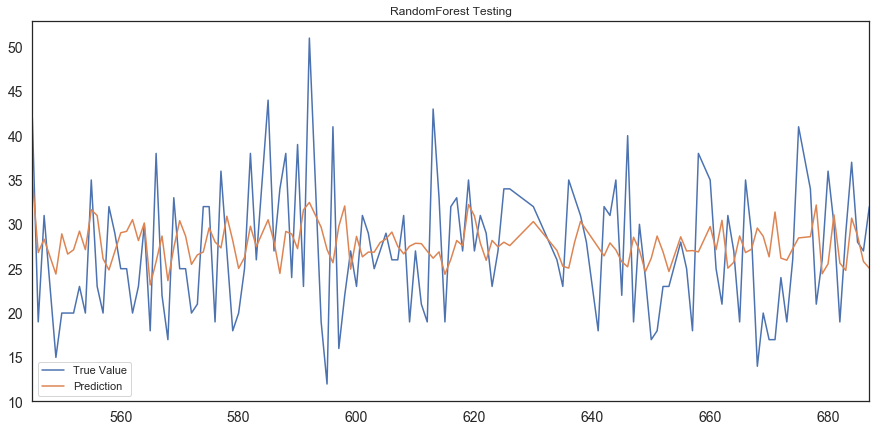

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.05684734049380724
test mse = 53.079315030769244


In [108]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'RandomForest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### XGBoost

In [109]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.001)
reg.fit(train_x.values, train_y.PredPts.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

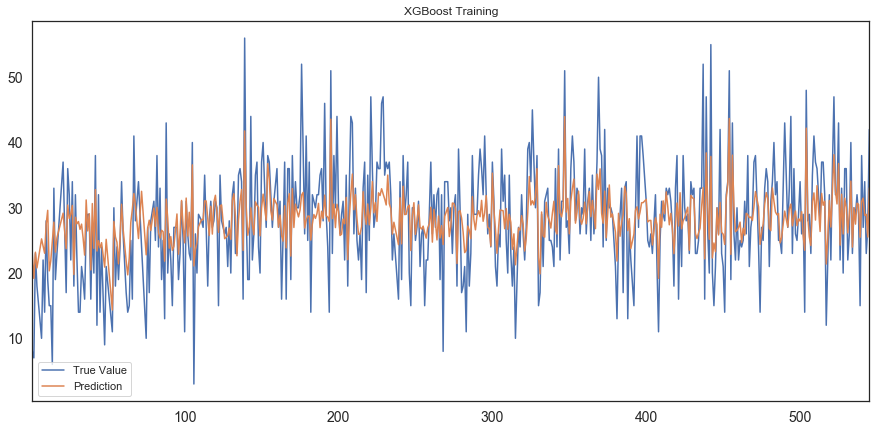

adj train r^2 = 0.46477370916839167
train mse = 0.5260078422156634


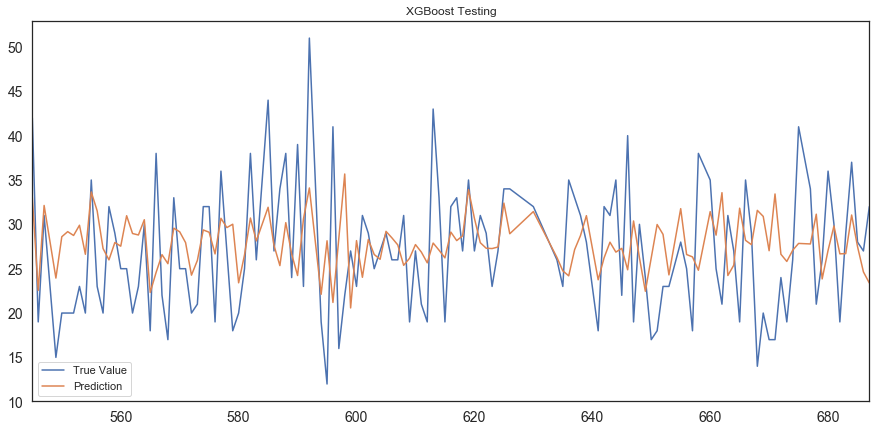

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.10328269992468764
test mse = 55.411493934343945


In [110]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, reg.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, reg.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### Feed Forward Neural Network

In [111]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

In [114]:
model = Sequential()
model.add(Dense(128, input_dim=23, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.PredPts.values.ravel(), validation_data=[test_x.values, test_y['PredPts'].values.ravel()], epochs=500,verbose=1,shuffle=False)

Train on 515 samples, validate on 130 samples
Epoch 1/500
515/515 [==============================] - ETA: 23s - loss: 21.745 - 2s 4ms/step - loss: 19.9789 - val_loss: 17.6390
Epoch 2/500
515/515 [==============================] - ETA: 0s - loss: 18.54 - 0s 83us/step - loss: 16.3517 - val_loss: 14.2621
Epoch 3/500
515/515 [==============================] - ETA: 0s - loss: 15.27 - 0s 95us/step - loss: 13.2295 - val_loss: 11.5589
Epoch 4/500
515/515 [==============================] - ETA: 0s - loss: 12.29 - 0s 103us/step - loss: 10.7182 - val_loss: 9.3488
Epoch 5/500
515/515 [==============================] - ETA: 0s - loss: 10.18 - 0s 103us/step - loss: 8.6801 - val_loss: 7.5419
Epoch 6/500
515/515 [==============================] - ETA: 0s - loss: 8.396 - 0s 97us/step - loss: 7.0447 - val_loss: 6.1181
Epoch 7/500
515/515 [==============================] - ETA: 0s - loss: 6.958 - 0s 95us/step - loss: 5.7567 - val_loss: 4.9774
Epoch 8/500
515/515 [==============================] - ETA: 0s

Epoch 65/500
515/515 [==============================] - ETA: 0s - loss: 1.730 - 0s 103us/step - loss: 1.0462 - val_loss: 0.8067
Epoch 66/500
515/515 [==============================] - ETA: 0s - loss: 1.737 - 0s 110us/step - loss: 1.0454 - val_loss: 0.8066
Epoch 67/500
515/515 [==============================] - ETA: 0s - loss: 1.732 - 0s 112us/step - loss: 1.0459 - val_loss: 0.8057
Epoch 68/500
515/515 [==============================] - ETA: 0s - loss: 1.728 - 0s 101us/step - loss: 1.0436 - val_loss: 0.8048
Epoch 69/500
515/515 [==============================] - ETA: 0s - loss: 1.730 - 0s 103us/step - loss: 1.0438 - val_loss: 0.8043
Epoch 70/500
515/515 [==============================] - ETA: 0s - loss: 1.726 - 0s 87us/step - loss: 1.0450 - val_loss: 0.8036
Epoch 71/500
515/515 [==============================] - ETA: 0s - loss: 1.723 - 0s 99us/step - loss: 1.0435 - val_loss: 0.8039
Epoch 72/500
515/515 [==============================] - ETA: 0s - loss: 1.728 - 0s 87us/step - loss: 1.042

515/515 [==============================] - ETA: 0s - loss: 1.717 - 0s 82us/step - loss: 1.0368 - val_loss: 0.7994
Epoch 130/500
515/515 [==============================] - ETA: 0s - loss: 1.709 - 0s 79us/step - loss: 1.0368 - val_loss: 0.7988
Epoch 131/500
515/515 [==============================] - ETA: 0s - loss: 1.723 - 0s 91us/step - loss: 1.0362 - val_loss: 0.7988
Epoch 132/500
515/515 [==============================] - ETA: 0s - loss: 1.729 - 0s 87us/step - loss: 1.0355 - val_loss: 0.7978
Epoch 133/500
515/515 [==============================] - ETA: 0s - loss: 1.729 - 0s 91us/step - loss: 1.0347 - val_loss: 0.7989
Epoch 134/500
515/515 [==============================] - ETA: 0s - loss: 1.731 - 0s 89us/step - loss: 1.0355 - val_loss: 0.7998
Epoch 135/500
515/515 [==============================] - ETA: 0s - loss: 1.712 - 0s 89us/step - loss: 1.0353 - val_loss: 0.8005
Epoch 136/500
515/515 [==============================] - ETA: 0s - loss: 1.725 - 0s 87us/step - loss: 1.0365 - val_los

515/515 [==============================] - ETA: 0s - loss: 1.691 - 0s 91us/step - loss: 1.0312 - val_loss: 0.8040
Epoch 194/500
515/515 [==============================] - ETA: 0s - loss: 1.713 - 0s 89us/step - loss: 1.0333 - val_loss: 0.8025
Epoch 195/500
515/515 [==============================] - ETA: 0s - loss: 1.727 - 0s 87us/step - loss: 1.0329 - val_loss: 0.8017
Epoch 196/500
515/515 [==============================] - ETA: 0s - loss: 1.724 - 0s 87us/step - loss: 1.0318 - val_loss: 0.8031
Epoch 197/500
515/515 [==============================] - ETA: 0s - loss: 1.728 - 0s 87us/step - loss: 1.0341 - val_loss: 0.8038
Epoch 198/500
515/515 [==============================] - ETA: 0s - loss: 1.725 - 0s 83us/step - loss: 1.0323 - val_loss: 0.8035
Epoch 199/500
515/515 [==============================] - ETA: 0s - loss: 1.731 - 0s 89us/step - loss: 1.0346 - val_loss: 0.8041
Epoch 200/500
515/515 [==============================] - ETA: 0s - loss: 1.724 - 0s 83us/step - loss: 1.0363 - val_los

Epoch 257/500
515/515 [==============================] - ETA: 0s - loss: 1.728 - 0s 83us/step - loss: 1.0341 - val_loss: 0.8003
Epoch 258/500
515/515 [==============================] - ETA: 0s - loss: 1.739 - 0s 89us/step - loss: 1.0336 - val_loss: 0.8033
Epoch 259/500
515/515 [==============================] - ETA: 0s - loss: 1.751 - 0s 95us/step - loss: 1.0365 - val_loss: 0.8026
Epoch 260/500
515/515 [==============================] - ETA: 0s - loss: 1.746 - 0s 85us/step - loss: 1.0334 - val_loss: 0.8029
Epoch 261/500
515/515 [==============================] - ETA: 0s - loss: 1.751 - 0s 83us/step - loss: 1.0388 - val_loss: 0.8026
Epoch 262/500
515/515 [==============================] - ETA: 0s - loss: 1.755 - 0s 95us/step - loss: 1.0341 - val_loss: 0.8037
Epoch 263/500
515/515 [==============================] - ETA: 0s - loss: 1.752 - 0s 87us/step - loss: 1.0382 - val_loss: 0.8031
Epoch 264/500
515/515 [==============================] - ETA: 0s - loss: 1.744 - 0s 86us/step - loss: 1.

Epoch 321/500
515/515 [==============================] - ETA: 0s - loss: 1.778 - 0s 91us/step - loss: 1.0342 - val_loss: 0.8040
Epoch 322/500
515/515 [==============================] - ETA: 0s - loss: 1.780 - 0s 87us/step - loss: 1.0277 - val_loss: 0.8032
Epoch 323/500
515/515 [==============================] - ETA: 0s - loss: 1.757 - 0s 93us/step - loss: 1.0324 - val_loss: 0.8047
Epoch 324/500
515/515 [==============================] - ETA: 0s - loss: 1.777 - 0s 86us/step - loss: 1.0349 - val_loss: 0.8017
Epoch 325/500
515/515 [==============================] - ETA: 0s - loss: 1.785 - 0s 89us/step - loss: 1.0382 - val_loss: 0.8019
Epoch 326/500
515/515 [==============================] - ETA: 0s - loss: 1.775 - 0s 89us/step - loss: 1.0353 - val_loss: 0.8001
Epoch 327/500
515/515 [==============================] - ETA: 0s - loss: 1.743 - 0s 91us/step - loss: 1.0305 - val_loss: 0.8011
Epoch 328/500
515/515 [==============================] - ETA: 0s - loss: 1.727 - 0s 87us/step - loss: 1.

Epoch 385/500
515/515 [==============================] - ETA: 0s - loss: 1.728 - 0s 81us/step - loss: 1.0211 - val_loss: 0.8040
Epoch 386/500
515/515 [==============================] - ETA: 0s - loss: 1.761 - 0s 89us/step - loss: 1.0335 - val_loss: 0.8008
Epoch 387/500
515/515 [==============================] - ETA: 0s - loss: 1.761 - 0s 85us/step - loss: 1.0259 - val_loss: 0.7978
Epoch 388/500
515/515 [==============================] - ETA: 0s - loss: 1.737 - 0s 91us/step - loss: 1.0288 - val_loss: 0.7987
Epoch 389/500
515/515 [==============================] - ETA: 0s - loss: 1.762 - 0s 85us/step - loss: 1.0285 - val_loss: 0.7999
Epoch 390/500
515/515 [==============================] - ETA: 0s - loss: 1.735 - 0s 89us/step - loss: 1.0272 - val_loss: 0.8062
Epoch 391/500
515/515 [==============================] - ETA: 0s - loss: 1.780 - 0s 87us/step - loss: 1.0349 - val_loss: 0.8014
Epoch 392/500
515/515 [==============================] - ETA: 0s - loss: 1.761 - 0s 85us/step - loss: 1.

Epoch 449/500
515/515 [==============================] - ETA: 0s - loss: 1.757 - 0s 87us/step - loss: 1.0268 - val_loss: 0.7979
Epoch 450/500
515/515 [==============================] - ETA: 0s - loss: 1.773 - 0s 91us/step - loss: 1.0231 - val_loss: 0.7997
Epoch 451/500
515/515 [==============================] - ETA: 0s - loss: 1.750 - 0s 85us/step - loss: 1.0222 - val_loss: 0.8000
Epoch 452/500
515/515 [==============================] - ETA: 0s - loss: 1.776 - 0s 85us/step - loss: 1.0301 - val_loss: 0.8003
Epoch 453/500
515/515 [==============================] - ETA: 0s - loss: 1.742 - 0s 95us/step - loss: 1.0212 - val_loss: 0.8021
Epoch 454/500
515/515 [==============================] - ETA: 0s - loss: 1.767 - 0s 89us/step - loss: 1.0292 - val_loss: 0.7996
Epoch 455/500
515/515 [==============================] - ETA: 0s - loss: 1.786 - 0s 83us/step - loss: 1.0263 - val_loss: 0.7986
Epoch 456/500
515/515 [==============================] - ETA: 0s - loss: 1.744 - 0s 95us/step - loss: 1.

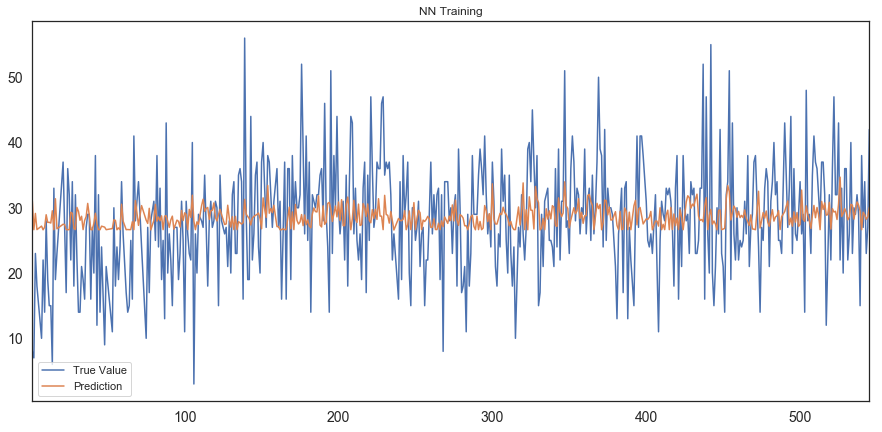

adj train r^2 = 0.004741173274150801
train mse = 0.9781170261250555


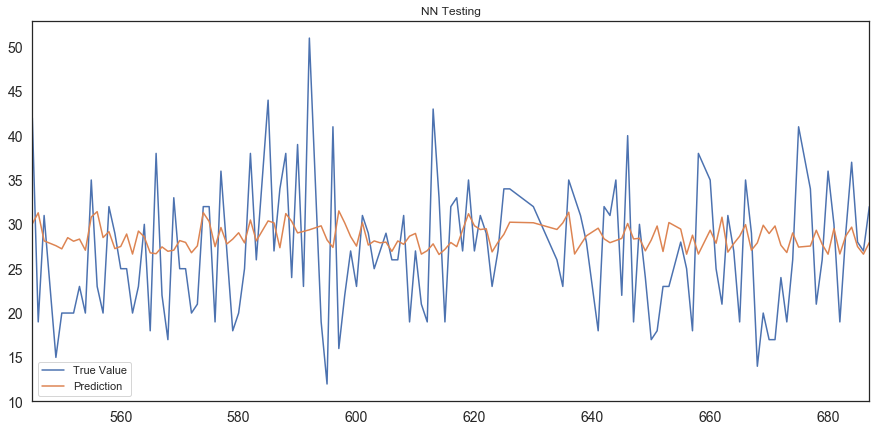

adj test r^2 = -0.07442339870293635
test mse = 53.96205854057984


In [115]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model.predict(train_x.values))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model.predict(train_x.values))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### LSTM

In [116]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [124]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='tanh',kernel_initializer='lecun_uniform',recurrent_regularizer=regularizers.l2(0.43),recurrent_dropout=.43))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=15, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.PredPts.values.ravel(), validation_data=[X_tst_t, test_y['PredPts'].values.ravel()], epochs=10, verbose=2, shuffle=False)

Train on 515 samples, validate on 130 samples
Epoch 1/10
 - 3s - loss: 153.5243 - val_loss: 63.3591
Epoch 2/10
 - 1s - loss: 35.6307 - val_loss: 14.4079
Epoch 3/10
 - 1s - loss: 8.4968 - val_loss: 3.7863
Epoch 4/10
 - 1s - loss: 2.5832 - val_loss: 1.4377
Epoch 5/10
 - 1s - loss: 1.2507 - val_loss: 0.9181
Epoch 6/10
 - 1s - loss: 0.9333 - val_loss: 0.8054
Epoch 7/10
 - 1s - loss: 0.8429 - val_loss: 0.7843
Epoch 8/10
 - 1s - loss: 0.8042 - val_loss: 0.7855
Epoch 9/10
 - 1s - loss: 0.7779 - val_loss: 0.7932
Epoch 10/10
 - 1s - loss: 0.7549 - val_loss: 0.8034


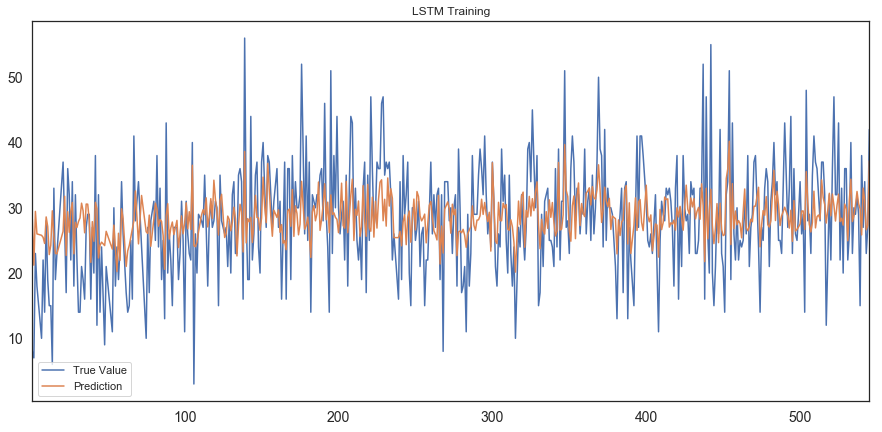

adj train r^2 = 0.2587512249539665
train mse = 0.7284819064122507


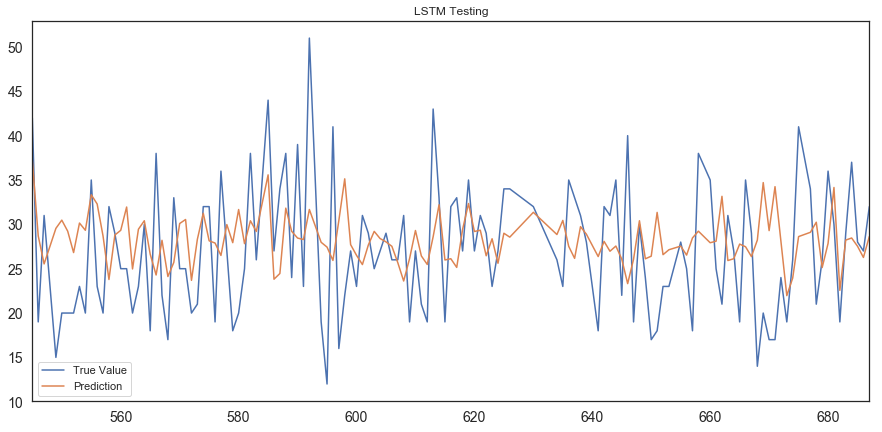

adj test r^2 = -0.1345206461258186
test mse = 56.980394875656174


In [125]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y.PredPts, model_lstm.predict(X_tr_t))),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y.PredPts, model_lstm.predict(X_tr_t))))
test_y2['PredPts'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))

### TPOT

In [126]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=5, max_time_mins=10, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.PredPts.values.ravel())


10.008013400000001 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: LinearSVR(LinearSVR(CombineDFs(ZeroCount(CombineDFs(ZeroCount(input_matrix), input_matrix)), LinearSVR(input_matrix, C=15.0, dual=True, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.1)), C=0.001, dual=True, epsilon=0.0001, loss=squared_epsilon_insensitive, tol=0.1), C=0.001, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.1)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=10, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
C:\Users\devi_\Anaconda3\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


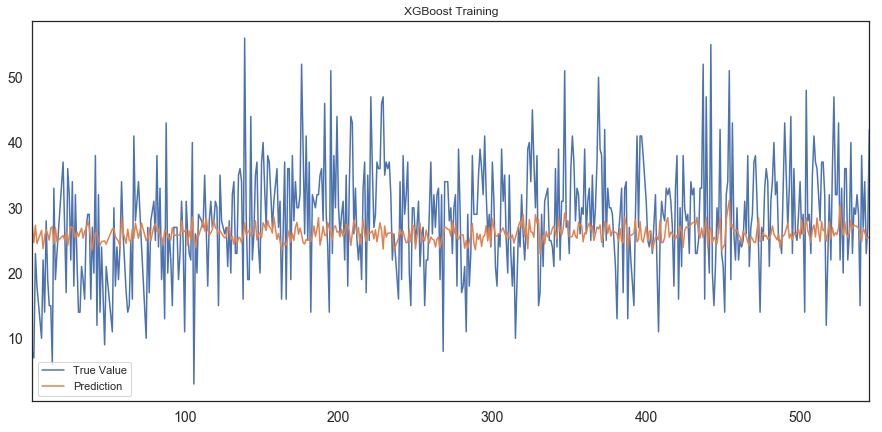

adj train r^2 = -0.07799004279247268
train mse = 75.14440871161719


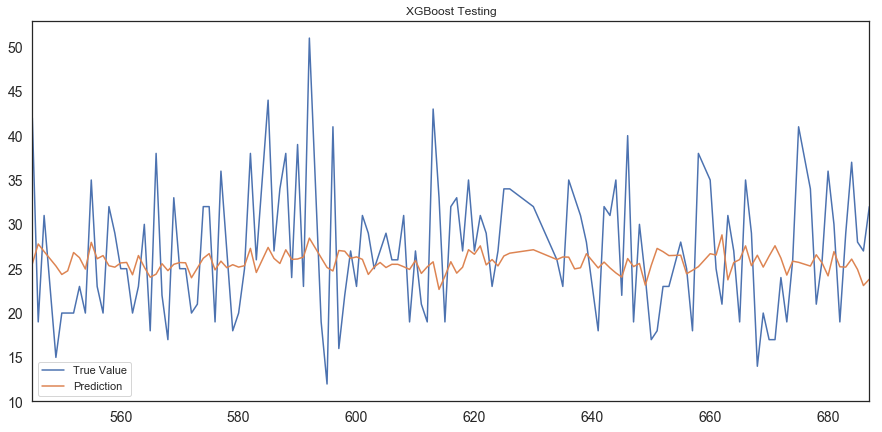

['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'GmSc', 'PTS', 'Opp', 'HC', 'Rest', 'CurrOpp', 'CurrHC', 'CurrRest']
adj test r^2 = -0.05794057452859991
test mse = 53.134221838509326


In [127]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['PredPts'] = sc2.inverse_transform(train_y2['PredPts'])
test_y2['PredPts'] = sc2.inverse_transform(test_y2['PredPts'])
train_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.PredPts, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.PredPts, train_y2.prediction)))
test_y2['PredPts'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.PredPts, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.PredPts, test_y2.prediction)))